In [1]:
# Python setup
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import torch.nn as nn
#import data functions and constants (no caps for easier typing)
import modelingfunctions.dataprocessing as d
import modelingfunctions.modeling as m
import modelingfunctions.utilities as u
from torch import cuda

In [2]:
num_targets = 50
batch_size = 128
epochs=100

In [3]:
dataloaders = d.get_target_dataloader(d.complex_data, num_targets=num_targets,
                                      batch_size=batch_size, pin_memory=True, 
                                      num_workers=2)

Using batch normalization for generalization
Gathering configurations
Configuration: 0:00:24.054178
Epoch: 1
Train_loss: 4.057756519317627, Val loss: 3.901484489440918, Test Accuracy: 0.03409090909090909
Epoch: 2
Train_loss: 3.892565755844116, Val loss: 3.888361930847168, Test Accuracy: 0.056818181818181816
Epoch: 3
Train_loss: 3.8592854022979735, Val loss: 3.8735227584838867, Test Accuracy: 0.056818181818181816
Epoch: 4
Train_loss: 3.821521797180176, Val loss: 3.8582663536071777, Test Accuracy: 0.045454545454545456
Epoch: 5
Train_loss: 3.797852954864502, Val loss: 3.8447349071502686, Test Accuracy: 0.056818181818181816
Epoch: 6
Train_loss: 3.7591569137573244, Val loss: 3.83270263671875, Test Accuracy: 0.045454545454545456
Epoch: 7
Train_loss: 3.7367476272583007, Val loss: 3.8190438747406006, Test Accuracy: 0.045454545454545456
Epoch: 8
Train_loss: 3.7042748641967775, Val loss: 3.8036468029022217, Test Accuracy: 0.056818181818181816
Epoch: 9
Train_loss: 3.661231670379639, Val loss: 3.7

Train_loss: 0.6220752620697021, Val loss: 2.1622190475463867, Test Accuracy: 0.36363636363636365
Epoch: 80
Train_loss: 0.5976672005653382, Val loss: 2.1507656574249268, Test Accuracy: 0.3977272727272727
Epoch: 81
Train_loss: 0.5857987904548645, Val loss: 2.1458821296691895, Test Accuracy: 0.3977272727272727
Epoch: 82
Train_loss: 0.5189460396766663, Val loss: 2.144392967224121, Test Accuracy: 0.42045454545454547
Epoch: 83
Train_loss: 0.5477569460868835, Val loss: 2.132739782333374, Test Accuracy: 0.4090909090909091
Epoch: 84
Train_loss: 0.528762559890747, Val loss: 2.1312813758850098, Test Accuracy: 0.4090909090909091
Epoch: 85
Train_loss: 0.49989436388015746, Val loss: 2.1404592990875244, Test Accuracy: 0.38636363636363635
Epoch: 86
Train_loss: 0.5125205445289612, Val loss: 2.1386637687683105, Test Accuracy: 0.3977272727272727
Epoch: 87
Train_loss: 0.49410534381866456, Val loss: 2.130014181137085, Test Accuracy: 0.38636363636363635
Epoch: 88
Train_loss: 0.45227465152740476, Val loss: 2

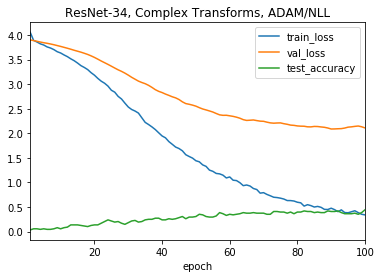

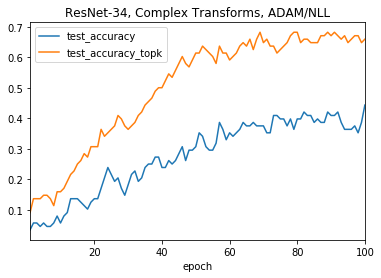

In [4]:

model = m.get_model(num_targets, generalization='batchnorm', layers='34')
optimizer = m.get_adam_optimizer(model)
criterion = nn.NLLLoss()

results = m.train_model(dataloaders=dataloaders, model=model, criterion=criterion,  topk=3,
                        name="ResNet-34, Complex Transforms, ADAM/NLL", optimizer=optimizer, 
                        epochs=epochs, clear_cuda_cache=True, print_epoch=True)
print(results['model_run_time'])
u.plot_results(results)
u.plot_accuracy(results)

## Lower learning rate to smooth the accuracy

Using batch normalization for generalization
Gathering configurations
Configuration: 0:00:24.809079
Epoch: 1
Train_loss: 4.052089004516602, Val loss: 3.905292272567749, Test Accuracy: 0.022727272727272728
Epoch: 2
Train_loss: 3.902424440383911, Val loss: 3.895691156387329, Test Accuracy: 0.022727272727272728
Epoch: 3
Train_loss: 3.884334754943848, Val loss: 3.8856618404388428, Test Accuracy: 0.022727272727272728
Epoch: 4
Train_loss: 3.869855318069458, Val loss: 3.877321481704712, Test Accuracy: 0.03409090909090909
Epoch: 5
Train_loss: 3.8531062412261963, Val loss: 3.8692286014556885, Test Accuracy: 0.03409090909090909
Epoch: 6
Train_loss: 3.8330445766448973, Val loss: 3.8616323471069336, Test Accuracy: 0.03409090909090909
Epoch: 7
Train_loss: 3.818694133758545, Val loss: 3.8542182445526123, Test Accuracy: 0.03409090909090909
Epoch: 8
Train_loss: 3.800674705505371, Val loss: 3.847799777984619, Test Accuracy: 0.045454545454545456
Epoch: 9
Train_loss: 3.7835770988464357, Val loss: 3.84214

Train_loss: 1.6851034593582153, Val loss: 2.7154524326324463, Test Accuracy: 0.32954545454545453
Epoch: 80
Train_loss: 1.7049304628372193, Val loss: 2.7035739421844482, Test Accuracy: 0.3409090909090909
Epoch: 81
Train_loss: 1.634128575325012, Val loss: 2.6947247982025146, Test Accuracy: 0.3409090909090909
Epoch: 82
Train_loss: 1.6193132209777832, Val loss: 2.6833391189575195, Test Accuracy: 0.32954545454545453
Epoch: 83
Train_loss: 1.6023968696594237, Val loss: 2.67035174369812, Test Accuracy: 0.32954545454545453
Epoch: 84
Train_loss: 1.5660460090637207, Val loss: 2.6544365882873535, Test Accuracy: 0.32954545454545453
Epoch: 85
Train_loss: 1.5606625556945801, Val loss: 2.637014150619507, Test Accuracy: 0.3409090909090909
Epoch: 86
Train_loss: 1.5516444206237794, Val loss: 2.617931365966797, Test Accuracy: 0.32954545454545453
Epoch: 87
Train_loss: 1.508965916633606, Val loss: 2.6113569736480713, Test Accuracy: 0.32954545454545453
Epoch: 88
Train_loss: 1.4673754596710205, Val loss: 2.60

Train_loss: 0.5304042816162109, Val loss: 2.3626859188079834, Test Accuracy: 0.4318181818181818
Epoch: 159
Train_loss: 0.552607616186142, Val loss: 2.359250783920288, Test Accuracy: 0.42045454545454547
Epoch: 160
Train_loss: 0.5287196469306946, Val loss: 2.3551313877105713, Test Accuracy: 0.42045454545454547
Epoch: 161
Train_loss: 0.50234832406044, Val loss: 2.3600375652313232, Test Accuracy: 0.3977272727272727
Epoch: 162
Train_loss: 0.5217281198501587, Val loss: 2.368701219558716, Test Accuracy: 0.4090909090909091
Epoch: 163
Train_loss: 0.49673932552337646, Val loss: 2.3753366470336914, Test Accuracy: 0.4318181818181818
Epoch: 164
Train_loss: 0.5263728809356689, Val loss: 2.3777639865875244, Test Accuracy: 0.4431818181818182
Epoch: 165
Train_loss: 0.46255926370620726, Val loss: 2.376558780670166, Test Accuracy: 0.45454545454545453
Epoch: 166
Train_loss: 0.49238420486450196, Val loss: 2.372513771057129, Test Accuracy: 0.45454545454545453
Epoch: 167
Train_loss: 0.4889775836467743, Val l

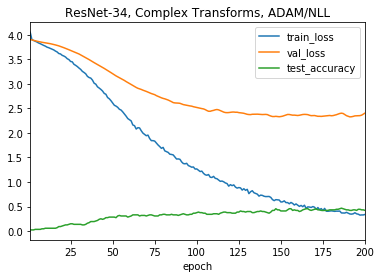

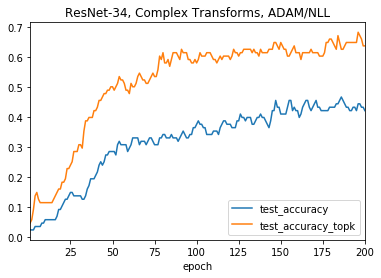

In [5]:
epochs=200
model = m.get_model(num_targets, generalization='batchnorm', layers='34')
optimizer = m.get_adam_optimizer(model, lr=0.0005)
criterion = nn.NLLLoss()

results = m.train_model(dataloaders=dataloaders, model=model, criterion=criterion,  topk=3,
                        name="ResNet-34, Complex Transforms, ADAM/NLL", optimizer=optimizer, 
                        epochs=epochs, clear_cuda_cache=True, print_epoch=True)
print(results['model_run_time'])
u.plot_results(results)
u.plot_accuracy(results)

## Even smaller learning rate

Using batch normalization for generalization
Gathering configurations
Configuration: 0:00:24.102282
Epoch: 1
Train_loss: 4.06120979309082, Val loss: 3.9141273498535156, Test Accuracy: 0.03409090909090909
Epoch: 2
Train_loss: 3.9078570938110353, Val loss: 3.911740303039551, Test Accuracy: 0.022727272727272728
Epoch: 3
Train_loss: 3.9048283386230467, Val loss: 3.909144639968872, Test Accuracy: 0.022727272727272728
Epoch: 4
Train_loss: 3.9004348850250246, Val loss: 3.9064767360687256, Test Accuracy: 0.03409090909090909
Epoch: 5
Train_loss: 3.8976287937164305, Val loss: 3.9037702083587646, Test Accuracy: 0.045454545454545456
Epoch: 6
Train_loss: 3.883413076400757, Val loss: 3.9011871814727783, Test Accuracy: 0.056818181818181816
Epoch: 7
Train_loss: 3.8814843559265135, Val loss: 3.8987014293670654, Test Accuracy: 0.06818181818181818
Epoch: 8
Train_loss: 3.8734908962249754, Val loss: 3.896315097808838, Test Accuracy: 0.06818181818181818
Epoch: 9
Train_loss: 3.8767419052124024, Val loss: 3.8

Train_loss: 3.486878499984741, Val loss: 3.7175133228302, Test Accuracy: 0.1590909090909091
Epoch: 80
Train_loss: 3.4892566871643065, Val loss: 3.7136390209198, Test Accuracy: 0.1590909090909091
Epoch: 81
Train_loss: 3.459879035949707, Val loss: 3.709750175476074, Test Accuracy: 0.1590909090909091
Epoch: 82
Train_loss: 3.4685807037353515, Val loss: 3.7059972286224365, Test Accuracy: 0.14772727272727273
Epoch: 83
Train_loss: 3.4752860260009766, Val loss: 3.702416181564331, Test Accuracy: 0.1590909090909091
Epoch: 84
Train_loss: 3.4431737518310546, Val loss: 3.698681116104126, Test Accuracy: 0.1590909090909091
Epoch: 85
Train_loss: 3.4515856075286866, Val loss: 3.694844961166382, Test Accuracy: 0.1590909090909091
Epoch: 86
Train_loss: 3.432803201675415, Val loss: 3.6912107467651367, Test Accuracy: 0.1590909090909091
Epoch: 87
Train_loss: 3.4481793022155762, Val loss: 3.687635660171509, Test Accuracy: 0.1590909090909091
Epoch: 88
Train_loss: 3.4168593311309814, Val loss: 3.683959245681762

Train_loss: 2.819172115325928, Val loss: 3.3712196350097656, Test Accuracy: 0.18181818181818182
Epoch: 158
Train_loss: 2.8159165382385254, Val loss: 3.366457462310791, Test Accuracy: 0.18181818181818182
Epoch: 159
Train_loss: 2.8285711193084717, Val loss: 3.3612890243530273, Test Accuracy: 0.19318181818181818
Epoch: 160
Train_loss: 2.80930624961853, Val loss: 3.355996608734131, Test Accuracy: 0.20454545454545456
Epoch: 161
Train_loss: 2.7903852558135984, Val loss: 3.3509466648101807, Test Accuracy: 0.20454545454545456
Epoch: 162
Train_loss: 2.798729362487793, Val loss: 3.3459126949310303, Test Accuracy: 0.2159090909090909
Epoch: 163
Train_loss: 2.7732129287719727, Val loss: 3.340620994567871, Test Accuracy: 0.2159090909090909
Epoch: 164
Train_loss: 2.768489999771118, Val loss: 3.334883689880371, Test Accuracy: 0.2159090909090909
Epoch: 165
Train_loss: 2.7505711460113527, Val loss: 3.329592227935791, Test Accuracy: 0.22727272727272727
Epoch: 166
Train_loss: 2.7511972999572754, Val loss:

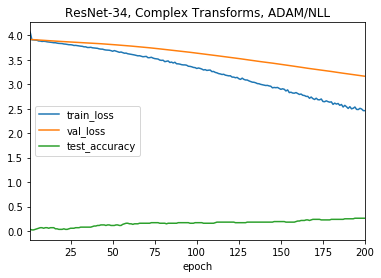

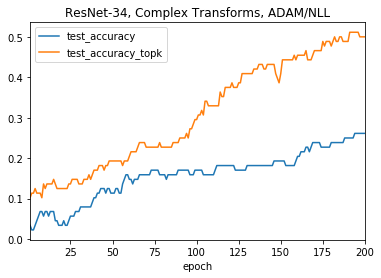

In [6]:
model = m.get_model(num_targets, generalization='batchnorm', layers='34')
optimizer = m.get_adam_optimizer(model, lr=0.0001)
criterion = nn.NLLLoss()

results = m.train_model(dataloaders=dataloaders, model=model, criterion=criterion,  topk=3,
                        name="ResNet-34, Complex Transforms, ADAM/NLL", optimizer=optimizer, 
                        epochs=epochs, clear_cuda_cache=True, print_epoch=True)
print(results['model_run_time'])
u.plot_results(results)
u.plot_accuracy(results)

## The Goldilocks learning rate

Using batch normalization for generalization
Gathering configurations
Configuration: 0:00:23.136837
Epoch: 1
Train_loss: 4.013234720230103, Val loss: 3.916571855545044, Test Accuracy: 0.0
Epoch: 2
Train_loss: 3.901876382827759, Val loss: 3.9111528396606445, Test Accuracy: 0.011363636363636364
Epoch: 3
Train_loss: 3.8923707675933836, Val loss: 3.9053802490234375, Test Accuracy: 0.03409090909090909
Epoch: 4
Train_loss: 3.883389596939087, Val loss: 3.899838924407959, Test Accuracy: 0.03409090909090909
Epoch: 5
Train_loss: 3.8714030265808104, Val loss: 3.89408278465271, Test Accuracy: 0.045454545454545456
Epoch: 6
Train_loss: 3.8547793674468993, Val loss: 3.8879990577697754, Test Accuracy: 0.056818181818181816
Epoch: 7
Train_loss: 3.844183797836304, Val loss: 3.881950616836548, Test Accuracy: 0.056818181818181816
Epoch: 8
Train_loss: 3.8387062454223635, Val loss: 3.875924825668335, Test Accuracy: 0.056818181818181816
Epoch: 9
Train_loss: 3.8277682781219484, Val loss: 3.8700506687164307, Te

Train_loss: 2.346525764465332, Val loss: 3.0281941890716553, Test Accuracy: 0.3409090909090909
Epoch: 82
Train_loss: 2.3226437854766844, Val loss: 3.0141305923461914, Test Accuracy: 0.32954545454545453
Epoch: 83
Train_loss: 2.3066080093383787, Val loss: 3.0002822875976562, Test Accuracy: 0.3409090909090909
Epoch: 84
Train_loss: 2.2833433628082274, Val loss: 2.985069990158081, Test Accuracy: 0.3409090909090909
Epoch: 85
Train_loss: 2.280833101272583, Val loss: 2.9692251682281494, Test Accuracy: 0.3409090909090909
Epoch: 86
Train_loss: 2.2487503814697267, Val loss: 2.9553351402282715, Test Accuracy: 0.3409090909090909
Epoch: 87
Train_loss: 2.205002145767212, Val loss: 2.9407739639282227, Test Accuracy: 0.3409090909090909
Epoch: 88
Train_loss: 2.1719173049926757, Val loss: 2.9257919788360596, Test Accuracy: 0.32954545454545453
Epoch: 89
Train_loss: 2.17800368309021, Val loss: 2.911926507949829, Test Accuracy: 0.3409090909090909
Epoch: 90
Train_loss: 2.141845817565918, Val loss: 2.90016317

Train_loss: 1.006909441947937, Val loss: 2.2957212924957275, Test Accuracy: 0.3409090909090909
Epoch: 160
Train_loss: 1.0086881709098816, Val loss: 2.2880449295043945, Test Accuracy: 0.3409090909090909
Epoch: 161
Train_loss: 0.9485375189781189, Val loss: 2.2832117080688477, Test Accuracy: 0.36363636363636365
Epoch: 162
Train_loss: 0.9611403727531433, Val loss: 2.278076410293579, Test Accuracy: 0.375
Epoch: 163
Train_loss: 0.9516238689422607, Val loss: 2.277705192565918, Test Accuracy: 0.38636363636363635
Epoch: 164
Train_loss: 0.9172359943389893, Val loss: 2.2763237953186035, Test Accuracy: 0.38636363636363635
Epoch: 165
Train_loss: 0.9652973628044128, Val loss: 2.273845672607422, Test Accuracy: 0.38636363636363635
Epoch: 166
Train_loss: 0.9154151082038879, Val loss: 2.270172119140625, Test Accuracy: 0.375
Epoch: 167
Train_loss: 0.8881977534294129, Val loss: 2.268571138381958, Test Accuracy: 0.375
Epoch: 168
Train_loss: 0.8939569330215454, Val loss: 2.264411687850952, Test Accuracy: 0.

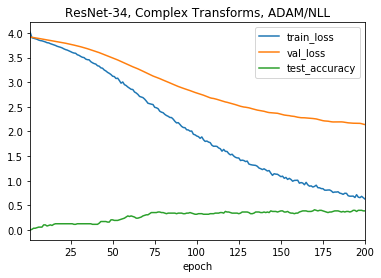

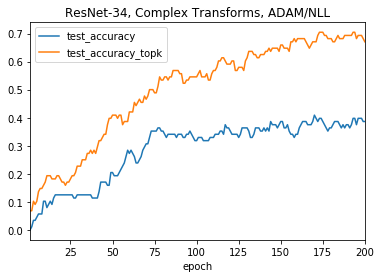

In [7]:
epochs=200
model = m.get_model(num_targets, generalization='batchnorm', layers='34')
optimizer = m.get_adam_optimizer(model, lr=0.0003)
criterion = nn.NLLLoss()

results = m.train_model(dataloaders=dataloaders, model=model, criterion=criterion,  topk=3,
                        name="ResNet-34, Complex Transforms, ADAM/NLL", optimizer=optimizer, 
                        epochs=epochs, clear_cuda_cache=True, print_epoch=True)
print(results['model_run_time'])
u.plot_results(results)
u.plot_accuracy(results)